In [36]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [110]:
r = requests.get('http://www.baseball-almanac.com/players/ballplayer.shtml')

In [111]:
soup = BeautifulSoup(r.content, 'html.parser')

In [112]:
BeautifulSoup.prettify(soup)

'<html>\n <head>\n  <title>\n   The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac\n  </title>\n  <meta content="Baseball Players Ballplayers Encyclopedia baseball players ballplayers encyclopedia" name="keywords"/>\n  <meta content="The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac." name="description"/>\n  <meta content="Geisler Young, LLC - http://www.geisleryoung.com/" name="Author"/>\n  <link href="../basitewideV2.css" rel="stylesheet" type="text/css"/>\n </head>\n <body background="../images/ba_bg.jpg" bgcolor="#FFFFFF">\n  <div align="center">\n   <!-- BEGIN GOOGLE ADSENSE -->\n   <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">\n   </script>\n   <!-- Responsive -->\n   <ins class="adsbygoogle" data-ad-client="ca-pub-7150597730414049" data-ad-format="auto" data-ad-slot="6668602445" style="display:block">\n   </ins>\n   <script>\n    (adsbygoogle = window.adsbygoogle || []).push({});\n   </script>\n   <!-- END G

In [113]:
td_tags = soup.find_all('td', {'class':'datacolBoxC'})

In [114]:
td_tags_yellow = soup.find_all('td', {'class': 'datacolBoxYellowC'})

In [115]:
td_tags_yellow

[<td class="datacolBoxYellowC" nowrap=""><a href="player-b.shtml"><span style="font-weight:bold; font-size: 14px;">Bab-Bar</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=babbch01" title="Show stats for Charlie Babb">Babb</a><br/>to<br/><a href="player.php?p=barreto01" title="Show stats for Tommy Barrett">Barrett</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b2.shtml"><span style="font-weight:bold; font-size: 14px;">Bar-Bel</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=barrija01" title="Show stats for Jaime Barria">Barria</a><br/>to<br/><a href="player.php?p=belltr01" title="Show stats for Trevor Bell">Bell</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b3.shtml"><span style="font-weight:bold; font-size: 14px;">Bel-Bla</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=bellaze01" title="Show stats for Zeke Bella">Bella</a><br/>to<br/><a href="player.ph

In [116]:
link_list = []
for td in td_tags:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE


In [117]:
for td in td_tags_yellow:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE
NONE


In [118]:
link_list = sorted(link_list)

In [119]:
link_list[0]

'player-a.shtml'

In [120]:
player_list = []
for l in link_list:
    print(l, len(link_list))
    c = requests.get('http://www.baseball-almanac.com/players/' + l).content
    soup = BeautifulSoup(c)
    td_tags = soup.find_all('td', {'class':'datacolBox'})
    for td in td_tags:   
        if 'href' in str(td):
            player_url = td.find('a').get('href')
            player_name = td.find('a').get_text().strip()
            player_list.append({'url':player_url,
                                'name':player_name})

player-a.shtml 84


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ethanarsht/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


player-a2.shtml 84
player-b.shtml 84
player-b2.shtml 84
player-b3.shtml 84
player-b4.shtml 84
player-b5.shtml 84
player-b6.shtml 84
player-b7.shtml 84
player-c.shtml 84
player-c2.shtml 84
player-c3.shtml 84
player-c4.shtml 84
player-c5.shtml 84
player-c6.shtml 84
player-d.shtml 84
player-d2.shtml 84
player-d3.shtml 84
player-d4.shtml 84
player-e.shtml 84
player-e2.shtml 84
player-f.shtml 84
player-f2.shtml 84
player-f3.shtml 84
player-g.shtml 84
player-g2.shtml 84
player-g3.shtml 84
player-g4.shtml 84
player-h.shtml 84
player-h2.shtml 84
player-h3.shtml 84
player-h4.shtml 84
player-h5.shtml 84
player-h6.shtml 84
player-i.shtml 84
player-j.shtml 84
player-j2.shtml 84
player-k.shtml 84
player-k2.shtml 84
player-k3.shtml 84
player-l.shtml 84
player-l2.shtml 84
player-l3.shtml 84
player-l4.shtml 84
player-m.shtml 84
player-m2.shtml 84
player-m3.shtml 84
player-m4.shtml 84
player-m5.shtml 84
player-m6.shtml 84
player-m7.shtml 84
player-m8.shtml 84
player-n.shtml 84
player-n2.shtml 84
player

In [121]:
df_players = pd.DataFrame(player_list)

In [122]:
df_players

,name,url
0,David Aardsma,player.php?p=aardsda01
1,Hank Aaron,player.php?p=aaronha01
2,Tommie Aaron,player.php?p=aaronto01
3,Don Aase,player.php?p=aasedo01
4,Andy Abad,player.php?p=abadan01
5,Fernando Abad,player.php?p=abadfe01
6,Ed Abbaticchio,player.php?p=abbated01
7,Bert Abbey,player.php?p=abbeybe01
8,Charlie Abbey,player.php?p=abbeych01
9,Dan Abbott,player.php?p=abbotda01


In [123]:
c = requests.get('http://www.baseball-almanac.com/players/player.php?p=abadfe01').content
soup = BeautifulSoup(c)

tables = soup.find_all('table', {'class':'boxed'})
for t in tables:
    if 'Totals' in str(t):
        print('this one')
        table = t

t_list = table.find_all('td', {'class' : 'datacolC'})
for td in t_list:
    if 'Totals' in str(td):
        pp = td.text.strip(' Totals')

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ethanarsht/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


this one


In [126]:
height_list = []
weight_list = []
name_list = []
url_list = []
firstyear_list = []
lastyear_list = []
pos_list = []
for i, row in df_players.iterrows():    
    print(str(i) + '/' + str(len(df_players)))
    c = requests.get('http://www.baseball-almanac.com/players/' + row['url']).content

    soup = BeautifulSoup(c)

    td_tags = soup.find_all('td', {'class':'biocolpad'})


    for i, td in enumerate(td_tags):
        if 'Height' in str(td):
            reference = i
            height_i = reference + 1

        if 'Weight' in str(td):
            weight_i = i + 1

    height = td_tags[height_i].get_text().strip()
    height_list.append(height)

    weight = td_tags[weight_i].get_text().strip()
    weight_list.append(weight)
    
    url_list.append(row['url'])
    name_list.append(row['name'])
    
    
#     grab first and last year
    tables = soup.find_all('table', {'class':'boxed'})

    r_list = []
    for t in tables:
        r = t.find_all('td', {'class':'datacolBoxC'})
        for td in r:
            r_list.append(td)

    del r_list[-1]

    year_list = []
    for r in r_list:
        if len(r.text) > 3:
            year_list.append(int(r.text))
    firstyear_list.append(year_list[0])
    lastyear_list.append(year_list[-1])
    

#     grab primary position
    for t in tables:
        if 'Totals' in str(t):
            table = t

    t_list = table.find_all('td', {'class' : 'datacolC'})
    for td in t_list:
        if 'Totals' in str(td):
            pp = td.text.strip(' Totals')
    pos_list.append(pp)



    

0/19132


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ethanarsht/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


this one
1/19132
this one
2/19132
this one
3/19132
this one
4/19132
this one
5/19132
this one
6/19132
this one
7/19132
this one
8/19132
this one
9/19132
this one
10/19132
this one
11/19132
this one
12/19132
this one
13/19132
this one
14/19132
this one
15/19132
this one
16/19132
this one
17/19132
this one
18/19132
this one
19/19132
this one
20/19132
this one
21/19132
this one
22/19132
this one
23/19132
this one
24/19132
this one
25/19132
this one
26/19132
this one
27/19132
this one
28/19132
this one
29/19132
this one
30/19132
this one
31/19132
this one
32/19132
this one
33/19132
this one
34/19132
this one
35/19132
this one
36/19132
this one
37/19132
this one
38/19132
this one
39/19132
this one
40/19132
this one
41/19132
this one
42/19132
this one
43/19132
this one
44/19132
this one
45/19132
this one
46/19132
this one
47/19132
this one
48/19132
this one
49/19132
this one
50/19132
this one
51/19132
this one
52/19132
this one
53/19132
this one
54/19132
this one
55/19132
this one
56/19132
t

this one
439/19132
this one
440/19132
this one
441/19132
this one
442/19132
this one
443/19132
this one
444/19132
this one
445/19132
this one
446/19132
this one
447/19132
this one
448/19132
this one
449/19132
this one
450/19132
this one
451/19132
this one
452/19132
this one
453/19132
this one
454/19132
this one
455/19132
this one
456/19132
this one
457/19132
this one
458/19132
this one
459/19132
this one
460/19132
this one
461/19132
this one
462/19132
this one
463/19132
this one
464/19132
this one
465/19132
this one
466/19132
this one
467/19132
this one
468/19132
this one
469/19132
this one
470/19132
this one
471/19132
this one
472/19132
this one
473/19132
this one
474/19132
this one
475/19132
this one
476/19132
this one
477/19132
this one
478/19132
this one
479/19132
this one
480/19132
this one
481/19132
this one
482/19132
this one
483/19132
this one
484/19132
this one
485/19132
this one
486/19132
this one
487/19132
this one
488/19132
this one
489/19132
this one
490/19132
this one
491

this one
872/19132
this one
873/19132
this one
874/19132
this one
875/19132
this one
876/19132
this one
877/19132
this one
878/19132
this one
879/19132
this one
880/19132
this one
881/19132
this one
882/19132
this one
883/19132
this one
884/19132
this one
885/19132
this one
886/19132
this one
887/19132
this one
888/19132
this one
889/19132
this one
890/19132
this one
891/19132
this one
892/19132
this one
893/19132
this one
894/19132
this one
895/19132
this one
896/19132
this one
897/19132
this one
898/19132
this one
899/19132
this one
900/19132
this one
901/19132
this one
902/19132
this one
903/19132
904/19132
this one
905/19132
this one
906/19132
this one
907/19132
this one
908/19132
this one
909/19132
this one
910/19132
this one
911/19132
this one
912/19132
this one
913/19132
this one
914/19132
this one
915/19132
this one
916/19132
this one
917/19132
this one
918/19132
this one
919/19132
this one
920/19132
this one
921/19132
this one
922/19132
this one
923/19132
this one
924/19132
th

this one
1290/19132
this one
1291/19132
this one
1292/19132
this one
1293/19132
this one
1294/19132
this one
1295/19132
this one
1296/19132
this one
1297/19132
this one
1298/19132
this one
1299/19132
this one
1300/19132
this one
1301/19132
this one
1302/19132
this one
1303/19132
this one
1304/19132
this one
1305/19132
this one
1306/19132
this one
1307/19132
this one
1308/19132
this one
1309/19132
this one
1310/19132
this one
1311/19132
this one
1312/19132
this one
1313/19132
this one
1314/19132
this one
1315/19132
this one
1316/19132
this one
1317/19132
this one
1318/19132
this one
1319/19132
this one
1320/19132
this one
1321/19132
this one
1322/19132
this one
1323/19132
this one
1324/19132
1325/19132
this one
1326/19132
this one
1327/19132
this one
1328/19132
this one
1329/19132
this one
1330/19132
this one
1331/19132
this one
1332/19132
this one
1333/19132
this one
1334/19132
this one
1335/19132
this one
1336/19132
this one
1337/19132
this one
1338/19132
this one
1339/19132
this one


this one
1701/19132
this one
1702/19132
this one
1703/19132
this one
1704/19132
this one
1705/19132
this one
1706/19132
this one
1707/19132
this one
1708/19132
1709/19132
this one
1710/19132
this one
1711/19132
this one
1712/19132
this one
1713/19132
this one
1714/19132
this one
1715/19132
this one
1716/19132
this one
1717/19132
this one
1718/19132
this one
1719/19132
this one
1720/19132
this one
1721/19132
this one
1722/19132
this one
1723/19132
this one
1724/19132
this one
1725/19132
this one
1726/19132
this one
1727/19132
this one
1728/19132
this one
1729/19132
this one
1730/19132
this one
1731/19132
this one
1732/19132
this one
1733/19132
this one
1734/19132
this one
1735/19132
this one
1736/19132
this one
1737/19132
this one
1738/19132
this one
1739/19132
this one
1740/19132
this one
1741/19132
this one
1742/19132
this one
1743/19132
this one
1744/19132
this one
1745/19132
this one
1746/19132
this one
1747/19132
this one
1748/19132
this one
1749/19132
this one
1750/19132
this one


this one
2112/19132
this one
2113/19132
this one
2114/19132
this one
2115/19132
this one
2116/19132
this one
2117/19132
this one
2118/19132
this one
2119/19132
this one
2120/19132
this one
2121/19132
this one
2122/19132
this one
2123/19132
this one
2124/19132
this one
2125/19132
this one
2126/19132
this one
2127/19132
this one
2128/19132
this one
2129/19132
this one
2130/19132
this one
2131/19132
this one
2132/19132
this one
2133/19132
this one
2134/19132
2135/19132
this one
2136/19132
this one
2137/19132
this one
2138/19132
this one
2139/19132
this one
2140/19132
this one
2141/19132
this one
2142/19132
this one
2143/19132
this one
2144/19132
this one
2145/19132
this one
2146/19132
this one
2147/19132
this one
2148/19132
this one
2149/19132
this one
2150/19132
this one
2151/19132
this one
2152/19132
this one
2153/19132
this one
2154/19132
2155/19132
this one
2156/19132
this one
2157/19132
this one
2158/19132
this one
2159/19132
this one
2160/19132
this one
2161/19132
this one
2162/1913

this one
2525/19132
this one
2526/19132
this one
2527/19132
this one
2528/19132
this one
2529/19132
this one
2530/19132
this one
2531/19132
this one
2532/19132
this one
2533/19132
this one
2534/19132
this one
2535/19132
this one
2536/19132
this one
2537/19132
this one
2538/19132
this one
2539/19132
this one
2540/19132
this one
2541/19132
this one
2542/19132
this one
2543/19132
this one
2544/19132
this one
2545/19132
this one
2546/19132
this one
2547/19132
this one
2548/19132
this one
2549/19132
this one
2550/19132
this one
2551/19132
this one
2552/19132
this one
2553/19132
this one
2554/19132
this one
2555/19132
this one
2556/19132
this one
2557/19132
this one
2558/19132
this one
2559/19132
this one
2560/19132
this one
2561/19132
this one
2562/19132
this one
2563/19132
this one
2564/19132
this one
2565/19132
this one
2566/19132
this one
2567/19132
this one
2568/19132
this one
2569/19132
this one
2570/19132
this one
2571/19132
this one
2572/19132
this one
2573/19132
this one
2574/19132


this one
2936/19132
this one
2937/19132
this one
2938/19132
this one
2939/19132
this one
2940/19132
this one
2941/19132
this one
2942/19132
this one
2943/19132
this one
2944/19132
this one
2945/19132
this one
2946/19132
this one
2947/19132
this one
2948/19132
this one
2949/19132
this one
2950/19132
this one
2951/19132
this one
2952/19132
this one
2953/19132
this one
2954/19132
this one
2955/19132
this one
2956/19132
this one
2957/19132
this one
2958/19132
this one
2959/19132
this one
2960/19132
this one
2961/19132
this one
2962/19132
this one
2963/19132
this one
2964/19132
this one
2965/19132
this one
2966/19132
this one
2967/19132
this one
2968/19132
this one
2969/19132
this one
2970/19132
this one
2971/19132
this one
2972/19132
this one
2973/19132
this one
2974/19132
this one
2975/19132
this one
2976/19132
this one
2977/19132
this one
2978/19132
this one
2979/19132
this one
2980/19132
this one
2981/19132
this one
2982/19132
this one
2983/19132
this one
2984/19132
this one
2985/19132


this one
3347/19132
this one
3348/19132
this one
3349/19132
this one
3350/19132
this one
3351/19132
this one
3352/19132
this one
3353/19132
this one
3354/19132
this one
3355/19132
this one
3356/19132
this one
3357/19132
this one
3358/19132
this one
3359/19132
this one
3360/19132
this one
3361/19132
this one
3362/19132
this one
3363/19132
3364/19132
this one
3365/19132
this one
3366/19132
this one
3367/19132
this one
3368/19132
this one
3369/19132
this one
3370/19132
this one
3371/19132
this one
3372/19132
this one
3373/19132
this one
3374/19132
this one
3375/19132
this one
3376/19132
this one
3377/19132
this one
3378/19132
this one
3379/19132
this one
3380/19132
this one
3381/19132
this one
3382/19132
this one
3383/19132
this one
3384/19132
this one
3385/19132
this one
3386/19132
this one
3387/19132
this one
3388/19132
this one
3389/19132
this one
3390/19132
this one
3391/19132
this one
3392/19132
this one
3393/19132
this one
3394/19132
this one
3395/19132
this one
3396/19132
this one


this one
3760/19132
this one
3761/19132
this one
3762/19132
this one
3763/19132
this one
3764/19132
this one
3765/19132
this one
3766/19132
this one
3767/19132
this one
3768/19132
this one
3769/19132
this one
3770/19132
this one
3771/19132
this one
3772/19132
this one
3773/19132
this one
3774/19132
this one
3775/19132
this one
3776/19132
this one
3777/19132
this one
3778/19132
this one
3779/19132
this one
3780/19132
this one
3781/19132
this one
3782/19132
this one
3783/19132
this one
3784/19132
this one
3785/19132
this one
3786/19132
this one
3787/19132
this one
3788/19132
this one
3789/19132
this one
3790/19132
this one
3791/19132
this one
3792/19132
this one
3793/19132
this one
3794/19132
this one
3795/19132
this one
3796/19132
this one
3797/19132
this one
3798/19132
this one
3799/19132
this one
3800/19132
this one
3801/19132
this one
3802/19132
this one
3803/19132
this one
3804/19132
this one
3805/19132
this one
3806/19132
this one
3807/19132
this one
3808/19132
this one
3809/19132


this one
4173/19132
this one
4174/19132
this one
4175/19132
this one
4176/19132
this one
4177/19132
this one
4178/19132
this one
4179/19132
this one
4180/19132
this one
4181/19132
this one
4182/19132
this one
4183/19132
this one
4184/19132
this one
4185/19132
this one
4186/19132
this one
4187/19132
this one
4188/19132
this one
4189/19132
this one
4190/19132
this one
4191/19132
this one
4192/19132
this one
4193/19132
this one
4194/19132
this one
4195/19132
this one
4196/19132
4197/19132
this one
4198/19132
this one
4199/19132
this one
4200/19132
this one
4201/19132
this one
4202/19132
this one
4203/19132
this one
4204/19132
this one
4205/19132
this one
4206/19132
this one
4207/19132
this one
4208/19132
this one
4209/19132
this one
4210/19132
this one
4211/19132
this one
4212/19132
this one
4213/19132
this one
4214/19132
this one
4215/19132
this one
4216/19132
this one
4217/19132
this one
4218/19132
this one
4219/19132
this one
4220/19132
this one
4221/19132
this one
4222/19132
this one


this one
4584/19132
this one
4585/19132
this one
4586/19132
this one
4587/19132
this one
4588/19132
this one
4589/19132
this one
4590/19132
this one
4591/19132
this one
4592/19132
this one
4593/19132
this one
4594/19132
this one
4595/19132
this one
4596/19132
this one
4597/19132
this one
4598/19132
this one
4599/19132
this one
4600/19132
this one
4601/19132
this one
4602/19132
this one
4603/19132
this one
4604/19132
this one
4605/19132
this one
4606/19132
this one
4607/19132
this one
4608/19132
this one
4609/19132
this one
4610/19132
this one
4611/19132
this one
4612/19132
this one
4613/19132
this one
4614/19132
this one
4615/19132
this one
4616/19132
this one
4617/19132
this one
4618/19132
this one
4619/19132
this one
4620/19132
this one
4621/19132
this one
4622/19132
this one
4623/19132
this one
4624/19132
this one
4625/19132
this one
4626/19132
this one
4627/19132
this one
4628/19132
this one
4629/19132
this one
4630/19132
this one
4631/19132
this one
4632/19132
this one
4633/19132


this one
4996/19132
this one
4997/19132
this one
4998/19132
this one
4999/19132
this one
5000/19132
this one
5001/19132
this one
5002/19132
this one
5003/19132
this one
5004/19132
this one
5005/19132
this one
5006/19132
this one
5007/19132
this one
5008/19132
this one
5009/19132
this one
5010/19132
this one
5011/19132
this one
5012/19132
this one
5013/19132
this one
5014/19132
this one
5015/19132
this one
5016/19132
this one
5017/19132
this one
5018/19132
this one
5019/19132
this one
5020/19132
this one
5021/19132
this one
5022/19132
this one
5023/19132
this one
5024/19132
this one
5025/19132
this one
5026/19132
this one
5027/19132
this one
5028/19132
this one
5029/19132
this one
5030/19132
this one
5031/19132
this one
5032/19132
this one
5033/19132
this one
5034/19132
this one
5035/19132
this one
5036/19132
this one
5037/19132
this one
5038/19132
this one
5039/19132
this one
5040/19132
this one
5041/19132
this one
5042/19132
this one
5043/19132
this one
5044/19132
this one
5045/19132


this one
5409/19132
this one
5410/19132
this one
5411/19132
this one
5412/19132
this one
5413/19132
this one
5414/19132
this one
5415/19132
this one
5416/19132
this one
5417/19132
this one
5418/19132
this one
5419/19132
this one
5420/19132
this one
5421/19132
this one
5422/19132
this one
5423/19132
this one
5424/19132
this one
5425/19132
this one
5426/19132
this one
5427/19132
this one
5428/19132
this one
5429/19132
this one
5430/19132
this one
5431/19132
this one
5432/19132
this one
5433/19132
5434/19132
this one
5435/19132
this one
5436/19132
this one
5437/19132
this one
5438/19132
this one
5439/19132
5440/19132
this one
5441/19132
this one
5442/19132
this one
5443/19132
this one
5444/19132
this one
5445/19132
this one
5446/19132
this one
5447/19132
this one
5448/19132
this one
5449/19132
this one
5450/19132
this one
5451/19132
5452/19132
this one
5453/19132
this one
5454/19132
this one
5455/19132
this one
5456/19132
this one
5457/19132
this one
5458/19132
this one
5459/19132
this on

this one
5823/19132
this one
5824/19132
this one
5825/19132
this one
5826/19132
this one
5827/19132
this one
5828/19132
this one
5829/19132
this one
5830/19132
this one
5831/19132
this one
5832/19132
this one
5833/19132
this one
5834/19132
this one
5835/19132
this one
5836/19132
this one
5837/19132
this one
5838/19132
this one
5839/19132
this one
5840/19132
this one
5841/19132
this one
5842/19132
this one
5843/19132
5844/19132
this one
5845/19132
this one
5846/19132
this one
5847/19132
this one
5848/19132
this one
5849/19132
5850/19132
this one
5851/19132
this one
5852/19132
this one
5853/19132
this one
5854/19132
5855/19132
this one
5856/19132
this one
5857/19132
this one
5858/19132
this one
5859/19132
this one
5860/19132
this one
5861/19132
this one
5862/19132
this one
5863/19132
this one
5864/19132
this one
5865/19132
this one
5866/19132
this one
5867/19132
this one
5868/19132
this one
5869/19132
this one
5870/19132
this one
5871/19132
this one
5872/19132
this one
5873/19132
this on

this one
6238/19132
this one
6239/19132
this one
6240/19132
this one
6241/19132
this one
6242/19132
this one
6243/19132
this one
6244/19132
this one
6245/19132
this one
6246/19132
this one
6247/19132
this one
6248/19132
this one
6249/19132
this one
6250/19132
this one
6251/19132
this one
6252/19132
this one
6253/19132
this one
6254/19132
this one
6255/19132
this one
6256/19132
this one
6257/19132
this one
6258/19132
this one
6259/19132
this one
6260/19132
this one
6261/19132
this one
6262/19132
this one
6263/19132
this one
6264/19132
this one
6265/19132
this one
6266/19132
this one
6267/19132
this one
6268/19132
this one
6269/19132
this one
6270/19132
this one
6271/19132
this one
6272/19132
this one
6273/19132
this one
6274/19132
this one
6275/19132
this one
6276/19132
this one
6277/19132
this one
6278/19132
this one
6279/19132
this one
6280/19132
this one
6281/19132
this one
6282/19132
this one
6283/19132
this one
6284/19132
this one
6285/19132
this one
6286/19132
this one
6287/19132


this one
6651/19132
this one
6652/19132
this one
6653/19132
this one
6654/19132
this one
6655/19132
this one
6656/19132
this one
6657/19132
this one
6658/19132
this one
6659/19132
this one
6660/19132
this one
6661/19132
this one
6662/19132
this one
6663/19132
this one
6664/19132
this one
6665/19132
this one
6666/19132
this one
6667/19132
this one
6668/19132
this one
6669/19132
this one
6670/19132
this one
6671/19132
this one
6672/19132
this one
6673/19132
this one
6674/19132
this one
6675/19132
this one
6676/19132
this one
6677/19132
this one
6678/19132
this one
6679/19132
this one
6680/19132
this one
6681/19132
this one
6682/19132
this one
6683/19132
this one
6684/19132
this one
6685/19132
this one
6686/19132
this one
6687/19132
this one
6688/19132
this one
6689/19132
this one
6690/19132
this one
6691/19132
this one
6692/19132
this one
6693/19132
this one
6694/19132
this one
6695/19132
this one
6696/19132
this one
6697/19132
this one
6698/19132
this one
6699/19132
this one
6700/19132


this one
7062/19132
this one
7063/19132
this one
7064/19132
this one
7065/19132
this one
7066/19132
this one
7067/19132
this one
7068/19132
this one
7069/19132
this one
7070/19132
this one
7071/19132
this one
7072/19132
this one
7073/19132
this one
7074/19132
this one
7075/19132
this one
7076/19132
this one
7077/19132
this one
7078/19132
this one
7079/19132
this one
7080/19132
this one
7081/19132
this one
7082/19132
this one
7083/19132
this one
7084/19132
this one
7085/19132
this one
7086/19132
this one
7087/19132
this one
7088/19132
this one
7089/19132
this one
7090/19132
7091/19132
this one
7092/19132
this one
7093/19132
this one
7094/19132
this one
7095/19132
this one
7096/19132
this one
7097/19132
this one
7098/19132
this one
7099/19132
this one
7100/19132
this one
7101/19132
this one
7102/19132
this one
7103/19132
this one
7104/19132
this one
7105/19132
this one
7106/19132
this one
7107/19132
this one
7108/19132
this one
7109/19132
this one
7110/19132
this one
7111/19132
7112/1913

this one
7475/19132
this one
7476/19132
this one
7477/19132
this one
7478/19132
this one
7479/19132
this one
7480/19132
this one
7481/19132
this one
7482/19132
this one
7483/19132
this one
7484/19132
this one
7485/19132
this one
7486/19132
this one
7487/19132
this one
7488/19132
this one
7489/19132
this one
7490/19132
this one
7491/19132
this one
7492/19132
this one
7493/19132
this one
7494/19132
this one
7495/19132
this one
7496/19132
this one
7497/19132
this one
7498/19132
this one
7499/19132
this one
7500/19132
this one
7501/19132
this one
7502/19132
this one
7503/19132
this one
7504/19132
this one
7505/19132
this one
7506/19132
this one
7507/19132
this one
7508/19132
this one
7509/19132
this one
7510/19132
this one
7511/19132
this one
7512/19132
this one
7513/19132
this one
7514/19132
this one
7515/19132
this one
7516/19132
this one
7517/19132
this one
7518/19132
this one
7519/19132
this one
7520/19132
this one
7521/19132
this one
7522/19132
this one
7523/19132
this one
7524/19132


this one
7886/19132
this one
7887/19132
this one
7888/19132
this one
7889/19132
this one
7890/19132
this one
7891/19132
this one
7892/19132
this one
7893/19132
this one
7894/19132
this one
7895/19132
this one
7896/19132
this one
7897/19132
this one
7898/19132
this one
7899/19132
this one
7900/19132
this one
7901/19132
this one
7902/19132
this one
7903/19132
this one
7904/19132
this one
7905/19132
this one
7906/19132
this one
7907/19132
this one
7908/19132
this one
7909/19132
this one
7910/19132
this one
7911/19132
this one
7912/19132
this one
7913/19132
this one
7914/19132
this one
7915/19132
this one
7916/19132
this one
7917/19132
this one
7918/19132
this one
7919/19132
this one
7920/19132
this one
7921/19132
this one
7922/19132
this one
7923/19132
this one
7924/19132
this one
7925/19132
this one
7926/19132
this one
7927/19132
this one
7928/19132
this one
7929/19132
this one
7930/19132
this one
7931/19132
this one
7932/19132
this one
7933/19132
this one
7934/19132
this one
7935/19132


this one
8297/19132
this one
8298/19132
this one
8299/19132
this one
8300/19132
this one
8301/19132
this one
8302/19132
this one
8303/19132
this one
8304/19132
this one
8305/19132
8306/19132
this one
8307/19132
this one
8308/19132
this one
8309/19132
this one
8310/19132
this one
8311/19132
this one
8312/19132
this one
8313/19132
this one
8314/19132
this one
8315/19132
this one
8316/19132
this one
8317/19132
this one
8318/19132
this one
8319/19132
this one
8320/19132
this one
8321/19132
this one
8322/19132
this one
8323/19132
this one
8324/19132
this one
8325/19132
this one
8326/19132
this one
8327/19132
this one
8328/19132
this one
8329/19132
this one
8330/19132
this one
8331/19132
this one
8332/19132
this one
8333/19132
this one
8334/19132
this one
8335/19132
this one
8336/19132
this one
8337/19132
this one
8338/19132
this one
8339/19132
this one
8340/19132
this one
8341/19132
this one
8342/19132
this one
8343/19132
this one
8344/19132
this one
8345/19132
this one
8346/19132
this one


this one
8709/19132
this one
8710/19132
this one
8711/19132
this one
8712/19132
this one
8713/19132
this one
8714/19132
this one
8715/19132
this one
8716/19132
this one
8717/19132
this one
8718/19132
this one
8719/19132
this one
8720/19132
this one
8721/19132
this one
8722/19132
this one
8723/19132
this one
8724/19132
this one
8725/19132
this one
8726/19132
this one
8727/19132
this one
8728/19132
this one
8729/19132
this one
8730/19132
this one
8731/19132
this one
8732/19132
this one
8733/19132
this one
8734/19132
this one
8735/19132
this one
8736/19132
this one
8737/19132
this one
8738/19132
this one
8739/19132
this one
8740/19132
this one
8741/19132
this one
8742/19132
this one
8743/19132
this one
8744/19132
this one
8745/19132
this one
8746/19132
this one
8747/19132
this one
8748/19132
this one
8749/19132
this one
8750/19132
this one
8751/19132
this one
8752/19132
this one
8753/19132
this one
8754/19132
this one
8755/19132
this one
8756/19132
this one
8757/19132
this one
8758/19132


this one
9122/19132
this one
9123/19132
this one
9124/19132
this one
9125/19132
this one
9126/19132
this one
9127/19132
this one
9128/19132
this one
9129/19132
this one
9130/19132
this one
9131/19132
this one
9132/19132
this one
9133/19132
this one
9134/19132
this one
9135/19132
this one
9136/19132
this one
9137/19132
this one
9138/19132
this one
9139/19132
this one
9140/19132
this one
9141/19132
this one
9142/19132
this one
9143/19132
this one
9144/19132
this one
9145/19132
this one
9146/19132
this one
9147/19132
this one
9148/19132
this one
9149/19132
this one
9150/19132
this one
9151/19132
this one
9152/19132
this one
9153/19132
this one
9154/19132
this one
9155/19132
this one
9156/19132
this one
9157/19132
this one
9158/19132
this one
9159/19132
this one
9160/19132
this one
9161/19132
this one
9162/19132
this one
9163/19132
this one
9164/19132
this one
9165/19132
this one
9166/19132
this one
9167/19132
this one
9168/19132
this one
9169/19132
this one
9170/19132
this one
9171/19132


this one
9534/19132
this one
9535/19132
this one
9536/19132
this one
9537/19132
this one
9538/19132
this one
9539/19132
this one
9540/19132
this one
9541/19132
this one
9542/19132
this one
9543/19132
this one
9544/19132
this one
9545/19132
this one
9546/19132
this one
9547/19132
this one
9548/19132
this one
9549/19132
this one
9550/19132
this one
9551/19132
this one
9552/19132
this one
9553/19132
this one
9554/19132
this one
9555/19132
this one
9556/19132
this one
9557/19132
this one
9558/19132
this one
9559/19132
this one
9560/19132
this one
9561/19132
this one
9562/19132
this one
9563/19132
this one
9564/19132
this one
9565/19132
this one
9566/19132
this one
9567/19132
this one
9568/19132
this one
9569/19132
this one
9570/19132
this one
9571/19132
this one
9572/19132
this one
9573/19132
this one
9574/19132
this one
9575/19132
this one
9576/19132
this one
9577/19132
this one
9578/19132
this one
9579/19132
this one
9580/19132
this one
9581/19132
this one
9582/19132
this one
9583/19132


this one
9945/19132
this one
9946/19132
this one
9947/19132
this one
9948/19132
this one
9949/19132
this one
9950/19132
this one
9951/19132
this one
9952/19132
this one
9953/19132
this one
9954/19132
this one
9955/19132
this one
9956/19132
this one
9957/19132
this one
9958/19132
this one
9959/19132
this one
9960/19132
this one
9961/19132
this one
9962/19132
this one
9963/19132
this one
9964/19132
this one
9965/19132
this one
9966/19132
this one
9967/19132
this one
9968/19132
this one
9969/19132
this one
9970/19132
this one
9971/19132
this one
9972/19132
this one
9973/19132
this one
9974/19132
this one
9975/19132
this one
9976/19132
this one
9977/19132
this one
9978/19132
this one
9979/19132
9980/19132
this one
9981/19132
this one
9982/19132
this one
9983/19132
this one
9984/19132
this one
9985/19132
this one
9986/19132
this one
9987/19132
this one
9988/19132
this one
9989/19132
this one
9990/19132
this one
9991/19132
this one
9992/19132
this one
9993/19132
this one
9994/19132
this one


this one
10341/19132
this one
10342/19132
this one
10343/19132
this one
10344/19132
this one
10345/19132
this one
10346/19132
this one
10347/19132
this one
10348/19132
this one
10349/19132
this one
10350/19132
this one
10351/19132
this one
10352/19132
this one
10353/19132
this one
10354/19132
this one
10355/19132
this one
10356/19132
this one
10357/19132
this one
10358/19132
this one
10359/19132
this one
10360/19132
this one
10361/19132
this one
10362/19132
this one
10363/19132
this one
10364/19132
this one
10365/19132
this one
10366/19132
this one
10367/19132
this one
10368/19132
this one
10369/19132
this one
10370/19132
this one
10371/19132
this one
10372/19132
this one
10373/19132
this one
10374/19132
this one
10375/19132
this one
10376/19132
this one
10377/19132
this one
10378/19132
this one
10379/19132
this one
10380/19132
this one
10381/19132
this one
10382/19132
this one
10383/19132
this one
10384/19132
this one
10385/19132
this one
10386/19132
this one
10387/19132
this one
1038

this one
10734/19132
this one
10735/19132
this one
10736/19132
this one
10737/19132
this one
10738/19132
this one
10739/19132
this one
10740/19132
this one
10741/19132
this one
10742/19132
this one
10743/19132
this one
10744/19132
this one
10745/19132
this one
10746/19132
this one
10747/19132
this one
10748/19132
this one
10749/19132
this one
10750/19132
this one
10751/19132
this one
10752/19132
this one
10753/19132
this one
10754/19132
this one
10755/19132
this one
10756/19132
this one
10757/19132
this one
10758/19132
this one
10759/19132
this one
10760/19132
this one
10761/19132
this one
10762/19132
this one
10763/19132
this one
10764/19132
this one
10765/19132
this one
10766/19132
this one
10767/19132
this one
10768/19132
this one
10769/19132
this one
10770/19132
this one
10771/19132
this one
10772/19132
this one
10773/19132
this one
10774/19132
this one
10775/19132
this one
10776/19132
this one
10777/19132
this one
10778/19132
this one
10779/19132
this one
10780/19132
this one
1078

this one
11126/19132
this one
11127/19132
this one
11128/19132
this one
11129/19132
this one
11130/19132
this one
11131/19132
this one
11132/19132
this one
11133/19132
this one
11134/19132
this one
11135/19132
this one
11136/19132
this one
11137/19132
this one
11138/19132
this one
11139/19132
this one
11140/19132
this one
11141/19132
this one
11142/19132
this one
11143/19132
this one
11144/19132
this one
11145/19132
this one
11146/19132
this one
11147/19132
this one
11148/19132
this one
11149/19132
this one
11150/19132
this one
11151/19132
this one
11152/19132
this one
11153/19132
this one
11154/19132
this one
11155/19132
this one
11156/19132
this one
11157/19132
this one
11158/19132
this one
11159/19132
this one
11160/19132
this one
11161/19132
this one
11162/19132
this one
11163/19132
this one
11164/19132
this one
11165/19132
this one
11166/19132
this one
11167/19132
this one
11168/19132
this one
11169/19132
this one
11170/19132
this one
11171/19132
this one
11172/19132
this one
1117

this one
11520/19132
this one
11521/19132
this one
11522/19132
this one
11523/19132
this one
11524/19132
this one
11525/19132
this one
11526/19132
this one
11527/19132
this one
11528/19132
this one
11529/19132
this one
11530/19132
this one
11531/19132
this one
11532/19132
this one
11533/19132
this one
11534/19132
this one
11535/19132
11536/19132
this one
11537/19132
this one
11538/19132
this one
11539/19132
this one
11540/19132
this one
11541/19132
this one
11542/19132
this one
11543/19132
this one
11544/19132
this one
11545/19132
this one
11546/19132
this one
11547/19132
this one
11548/19132
this one
11549/19132
this one
11550/19132
this one
11551/19132
this one
11552/19132
this one
11553/19132
this one
11554/19132
this one
11555/19132
this one
11556/19132
this one
11557/19132
this one
11558/19132
this one
11559/19132
this one
11560/19132
this one
11561/19132
this one
11562/19132
this one
11563/19132
this one
11564/19132
this one
11565/19132
this one
11566/19132
this one
11567/19132
t

this one
11913/19132
this one
11914/19132
this one
11915/19132
this one
11916/19132
this one
11917/19132
this one
11918/19132
this one
11919/19132
this one
11920/19132
this one
11921/19132
this one
11922/19132
this one
11923/19132
this one
11924/19132
this one
11925/19132
this one
11926/19132
this one
11927/19132
this one
11928/19132
this one
11929/19132
this one
11930/19132
this one
11931/19132
this one
11932/19132
this one
11933/19132
this one
11934/19132
this one
11935/19132
this one
11936/19132
this one
11937/19132
this one
11938/19132
this one
11939/19132
this one
11940/19132
this one
11941/19132
this one
11942/19132
this one
11943/19132
this one
11944/19132
this one
11945/19132
this one
11946/19132
this one
11947/19132
this one
11948/19132
this one
11949/19132
this one
11950/19132
this one
11951/19132
this one
11952/19132
this one
11953/19132
this one
11954/19132
this one
11955/19132
this one
11956/19132
this one
11957/19132
this one
11958/19132
this one
11959/19132
this one
1196

this one
12305/19132
this one
12306/19132
this one
12307/19132
this one
12308/19132
this one
12309/19132
this one
12310/19132
this one
12311/19132
this one
12312/19132
this one
12313/19132
this one
12314/19132
this one
12315/19132
this one
12316/19132
this one
12317/19132
this one
12318/19132
this one
12319/19132
this one
12320/19132
this one
12321/19132
this one
12322/19132
this one
12323/19132
this one
12324/19132
this one
12325/19132
this one
12326/19132
this one
12327/19132
this one
12328/19132
this one
12329/19132
this one
12330/19132
this one
12331/19132
this one
12332/19132
this one
12333/19132
this one
12334/19132
this one
12335/19132
this one
12336/19132
this one
12337/19132
this one
12338/19132
this one
12339/19132
this one
12340/19132
this one
12341/19132
this one
12342/19132
this one
12343/19132
this one
12344/19132
this one
12345/19132
this one
12346/19132
this one
12347/19132
this one
12348/19132
this one
12349/19132
this one
12350/19132
this one
12351/19132
this one
1235

this one
12696/19132
this one
12697/19132
this one
12698/19132
this one
12699/19132
this one
12700/19132
this one
12701/19132
this one
12702/19132
this one
12703/19132
this one
12704/19132
this one
12705/19132
this one
12706/19132
this one
12707/19132
this one
12708/19132
this one
12709/19132
this one
12710/19132
this one
12711/19132
this one
12712/19132
this one
12713/19132
this one
12714/19132
this one
12715/19132
this one
12716/19132
this one
12717/19132
this one
12718/19132
this one
12719/19132
this one
12720/19132
this one
12721/19132
this one
12722/19132
this one
12723/19132
this one
12724/19132
this one
12725/19132
this one
12726/19132
this one
12727/19132
this one
12728/19132
this one
12729/19132
this one
12730/19132
this one
12731/19132
this one
12732/19132
this one
12733/19132
this one
12734/19132
this one
12735/19132
this one
12736/19132
this one
12737/19132
this one
12738/19132
this one
12739/19132
this one
12740/19132
this one
12741/19132
this one
12742/19132
this one
1274

this one
13089/19132
this one
13090/19132
this one
13091/19132
this one
13092/19132
this one
13093/19132
this one
13094/19132
this one
13095/19132
this one
13096/19132
this one
13097/19132
this one
13098/19132
this one
13099/19132
this one
13100/19132
this one
13101/19132
this one
13102/19132
this one
13103/19132
this one
13104/19132
this one
13105/19132
this one
13106/19132
this one
13107/19132
this one
13108/19132
this one
13109/19132
this one
13110/19132
this one
13111/19132
this one
13112/19132
this one
13113/19132
this one
13114/19132
this one
13115/19132
this one
13116/19132
this one
13117/19132
this one
13118/19132
this one
13119/19132
this one
13120/19132
this one
13121/19132
this one
13122/19132
this one
13123/19132
this one
13124/19132
this one
13125/19132
this one
13126/19132
this one
13127/19132
this one
13128/19132
this one
13129/19132
this one
13130/19132
this one
13131/19132
this one
13132/19132
this one
13133/19132
this one
13134/19132
this one
13135/19132
this one
1313

this one
13480/19132
this one
13481/19132
this one
13482/19132
this one
13483/19132
this one
13484/19132
this one
13485/19132
this one
13486/19132
this one
13487/19132
this one
13488/19132
this one
13489/19132
this one
13490/19132
this one
13491/19132
this one
13492/19132
this one
13493/19132
this one
13494/19132
this one
13495/19132
this one
13496/19132
this one
13497/19132
this one
13498/19132
this one
13499/19132
13500/19132
this one
13501/19132
this one
13502/19132
this one
13503/19132
this one
13504/19132
this one
13505/19132
this one
13506/19132
this one
13507/19132
this one
13508/19132
this one
13509/19132
this one
13510/19132
this one
13511/19132
this one
13512/19132
this one
13513/19132
this one
13514/19132
this one
13515/19132
this one
13516/19132
this one
13517/19132
this one
13518/19132
this one
13519/19132
this one
13520/19132
this one
13521/19132
this one
13522/19132
13523/19132
this one
13524/19132
this one
13525/19132
this one
13526/19132
this one
13527/19132
this one
1

this one
13874/19132
this one
13875/19132
this one
13876/19132
this one
13877/19132
this one
13878/19132
this one
13879/19132
this one
13880/19132
this one
13881/19132
this one
13882/19132
this one
13883/19132
this one
13884/19132
this one
13885/19132
this one
13886/19132
this one
13887/19132
this one
13888/19132
this one
13889/19132
this one
13890/19132
this one
13891/19132
this one
13892/19132
this one
13893/19132
this one
13894/19132
this one
13895/19132
this one
13896/19132
this one
13897/19132
this one
13898/19132
this one
13899/19132
this one
13900/19132
this one
13901/19132
this one
13902/19132
this one
13903/19132
this one
13904/19132
this one
13905/19132
this one
13906/19132
this one
13907/19132
this one
13908/19132
this one
13909/19132
this one
13910/19132
13911/19132
this one
13912/19132
this one
13913/19132
this one
13914/19132
this one
13915/19132
this one
13916/19132
this one
13917/19132
this one
13918/19132
this one
13919/19132
this one
13920/19132
this one
13921/19132
t

this one
14266/19132
this one
14267/19132
this one
14268/19132
this one
14269/19132
this one
14270/19132
this one
14271/19132
this one
14272/19132
this one
14273/19132
this one
14274/19132
this one
14275/19132
this one
14276/19132
this one
14277/19132
this one
14278/19132
this one
14279/19132
this one
14280/19132
this one
14281/19132
this one
14282/19132
this one
14283/19132
this one
14284/19132
this one
14285/19132
this one
14286/19132
this one
14287/19132
this one
14288/19132
this one
14289/19132
this one
14290/19132
this one
14291/19132
this one
14292/19132
this one
14293/19132
this one
14294/19132
this one
14295/19132
this one
14296/19132
this one
14297/19132
this one
14298/19132
this one
14299/19132
this one
14300/19132
this one
14301/19132
this one
14302/19132
this one
14303/19132
this one
14304/19132
this one
14305/19132
this one
14306/19132
this one
14307/19132
this one
14308/19132
this one
14309/19132
this one
14310/19132
this one
14311/19132
this one
14312/19132
this one
1431

this one
14657/19132
this one
14658/19132
this one
14659/19132
this one
14660/19132
this one
14661/19132
this one
14662/19132
this one
14663/19132
this one
14664/19132
this one
14665/19132
this one
14666/19132
this one
14667/19132
this one
14668/19132
this one
14669/19132
this one
14670/19132
this one
14671/19132
this one
14672/19132
this one
14673/19132
this one
14674/19132
this one
14675/19132
this one
14676/19132
this one
14677/19132
this one
14678/19132
this one
14679/19132
this one
14680/19132
this one
14681/19132
this one
14682/19132
this one
14683/19132
this one
14684/19132
this one
14685/19132
this one
14686/19132
this one
14687/19132
this one
14688/19132
this one
14689/19132
this one
14690/19132
this one
14691/19132
this one
14692/19132
this one
14693/19132
this one
14694/19132
this one
14695/19132
this one
14696/19132
this one
14697/19132
this one
14698/19132
this one
14699/19132
this one
14700/19132
this one
14701/19132
this one
14702/19132
this one
14703/19132
this one
1470

this one
15048/19132
this one
15049/19132
this one
15050/19132
this one
15051/19132
this one
15052/19132
this one
15053/19132
this one
15054/19132
this one
15055/19132
this one
15056/19132
this one
15057/19132
this one
15058/19132
this one
15059/19132
this one
15060/19132
this one
15061/19132
this one
15062/19132
this one
15063/19132
this one
15064/19132
this one
15065/19132
this one
15066/19132
this one
15067/19132
this one
15068/19132
this one
15069/19132
this one
15070/19132
this one
15071/19132
this one
15072/19132
this one
15073/19132
this one
15074/19132
this one
15075/19132
this one
15076/19132
this one
15077/19132
this one
15078/19132
this one
15079/19132
this one
15080/19132
this one
15081/19132
this one
15082/19132
this one
15083/19132
this one
15084/19132
this one
15085/19132
this one
15086/19132
this one
15087/19132
this one
15088/19132
this one
15089/19132
this one
15090/19132
this one
15091/19132
this one
15092/19132
this one
15093/19132
this one
15094/19132
this one
1509

this one
15442/19132
this one
15443/19132
this one
15444/19132
this one
15445/19132
this one
15446/19132
this one
15447/19132
this one
15448/19132
this one
15449/19132
this one
15450/19132
this one
15451/19132
this one
15452/19132
this one
15453/19132
this one
15454/19132
this one
15455/19132
this one
15456/19132
this one
15457/19132
this one
15458/19132
this one
15459/19132
this one
15460/19132
this one
15461/19132
this one
15462/19132
this one
15463/19132
this one
15464/19132
this one
15465/19132
this one
15466/19132
this one
15467/19132
this one
15468/19132
this one
15469/19132
this one
15470/19132
this one
15471/19132
this one
15472/19132
this one
15473/19132
this one
15474/19132
this one
15475/19132
this one
15476/19132
this one
15477/19132
this one
15478/19132
this one
15479/19132
this one
15480/19132
this one
15481/19132
this one
15482/19132
this one
15483/19132
this one
15484/19132
this one
15485/19132
this one
15486/19132
this one
15487/19132
this one
15488/19132
this one
1548

this one
15835/19132
this one
15836/19132
this one
15837/19132
this one
15838/19132
this one
15839/19132
this one
15840/19132
this one
15841/19132
this one
15842/19132
this one
15843/19132
this one
15844/19132
this one
15845/19132
this one
15846/19132
this one
15847/19132
this one
15848/19132
this one
15849/19132
this one
15850/19132
this one
15851/19132
this one
15852/19132
this one
15853/19132
this one
15854/19132
this one
15855/19132
this one
15856/19132
this one
15857/19132
this one
15858/19132
this one
15859/19132
this one
15860/19132
this one
15861/19132
this one
15862/19132
this one
15863/19132
this one
15864/19132
this one
15865/19132
this one
15866/19132
this one
15867/19132
this one
15868/19132
this one
15869/19132
this one
15870/19132
this one
15871/19132
this one
15872/19132
this one
15873/19132
this one
15874/19132
this one
15875/19132
this one
15876/19132
this one
15877/19132
this one
15878/19132
this one
15879/19132
this one
15880/19132
this one
15881/19132
this one
1588

this one
16227/19132
this one
16228/19132
this one
16229/19132
this one
16230/19132
this one
16231/19132
this one
16232/19132
this one
16233/19132
this one
16234/19132
16235/19132
this one
16236/19132
this one
16237/19132
this one
16238/19132
this one
16239/19132
this one
16240/19132
this one
16241/19132
this one
16242/19132
this one
16243/19132
this one
16244/19132
this one
16245/19132
this one
16246/19132
this one
16247/19132
this one
16248/19132
this one
16249/19132
this one
16250/19132
this one
16251/19132
this one
16252/19132
this one
16253/19132
this one
16254/19132
this one
16255/19132
this one
16256/19132
this one
16257/19132
this one
16258/19132
this one
16259/19132
this one
16260/19132
this one
16261/19132
this one
16262/19132
this one
16263/19132
this one
16264/19132
this one
16265/19132
this one
16266/19132
this one
16267/19132
this one
16268/19132
this one
16269/19132
this one
16270/19132
this one
16271/19132
this one
16272/19132
this one
16273/19132
this one
16274/19132
t

this one
16619/19132
this one
16620/19132
this one
16621/19132
this one
16622/19132
this one
16623/19132
this one
16624/19132
this one
16625/19132
this one
16626/19132
this one
16627/19132
this one
16628/19132
this one
16629/19132
this one
16630/19132
this one
16631/19132
this one
16632/19132
this one
16633/19132
this one
16634/19132
this one
16635/19132
this one
16636/19132
this one
16637/19132
this one
16638/19132
this one
16639/19132
this one
16640/19132
this one
16641/19132
this one
16642/19132
this one
16643/19132
this one
16644/19132
this one
16645/19132
this one
16646/19132
this one
16647/19132
this one
16648/19132
this one
16649/19132
this one
16650/19132
this one
16651/19132
this one
16652/19132
this one
16653/19132
this one
16654/19132
this one
16655/19132
this one
16656/19132
this one
16657/19132
this one
16658/19132
this one
16659/19132
this one
16660/19132
this one
16661/19132
this one
16662/19132
this one
16663/19132
this one
16664/19132
this one
16665/19132
this one
1666

this one
17010/19132
this one
17011/19132
this one
17012/19132
this one
17013/19132
this one
17014/19132
this one
17015/19132
this one
17016/19132
this one
17017/19132
this one
17018/19132
this one
17019/19132
this one
17020/19132
this one
17021/19132
this one
17022/19132
this one
17023/19132
this one
17024/19132
this one
17025/19132
this one
17026/19132
this one
17027/19132
this one
17028/19132
this one
17029/19132
this one
17030/19132
this one
17031/19132
this one
17032/19132
this one
17033/19132
17034/19132
this one
17035/19132
this one
17036/19132
this one
17037/19132
this one
17038/19132
this one
17039/19132
this one
17040/19132
this one
17041/19132
this one
17042/19132
this one
17043/19132
this one
17044/19132
this one
17045/19132
this one
17046/19132
this one
17047/19132
this one
17048/19132
this one
17049/19132
this one
17050/19132
this one
17051/19132
this one
17052/19132
this one
17053/19132
this one
17054/19132
this one
17055/19132
this one
17056/19132
this one
17057/19132
t

this one
17403/19132
this one
17404/19132
this one
17405/19132
this one
17406/19132
this one
17407/19132
this one
17408/19132
this one
17409/19132
this one
17410/19132
this one
17411/19132
this one
17412/19132
this one
17413/19132
this one
17414/19132
this one
17415/19132
this one
17416/19132
this one
17417/19132
this one
17418/19132
this one
17419/19132
this one
17420/19132
this one
17421/19132
this one
17422/19132
this one
17423/19132
this one
17424/19132
this one
17425/19132
this one
17426/19132
this one
17427/19132
this one
17428/19132
this one
17429/19132
this one
17430/19132
this one
17431/19132
this one
17432/19132
this one
17433/19132
this one
17434/19132
this one
17435/19132
this one
17436/19132
this one
17437/19132
this one
17438/19132
this one
17439/19132
this one
17440/19132
this one
17441/19132
this one
17442/19132
this one
17443/19132
this one
17444/19132
this one
17445/19132
this one
17446/19132
this one
17447/19132
this one
17448/19132
this one
17449/19132
this one
1745

this one
17796/19132
this one
17797/19132
this one
17798/19132
this one
17799/19132
this one
17800/19132
this one
17801/19132
this one
17802/19132
this one
17803/19132
this one
17804/19132
this one
17805/19132
this one
17806/19132
this one
17807/19132
this one
17808/19132
this one
17809/19132
this one
17810/19132
this one
17811/19132
this one
17812/19132
this one
17813/19132
this one
17814/19132
this one
17815/19132
this one
17816/19132
this one
17817/19132
this one
17818/19132
this one
17819/19132
this one
17820/19132
this one
17821/19132
this one
17822/19132
this one
17823/19132
this one
17824/19132
this one
17825/19132
this one
17826/19132
this one
17827/19132
this one
17828/19132
this one
17829/19132
this one
17830/19132
this one
17831/19132
this one
17832/19132
this one
17833/19132
this one
17834/19132
this one
17835/19132
this one
17836/19132
this one
17837/19132
this one
17838/19132
this one
17839/19132
this one
17840/19132
this one
17841/19132
this one
17842/19132
this one
1784

this one
18187/19132
this one
18188/19132
this one
18189/19132
this one
18190/19132
this one
18191/19132
this one
18192/19132
this one
18193/19132
this one
18194/19132
this one
18195/19132
this one
18196/19132
18197/19132
this one
18198/19132
this one
18199/19132
this one
18200/19132
this one
18201/19132
this one
18202/19132
this one
18203/19132
this one
18204/19132
this one
18205/19132
this one
18206/19132
this one
18207/19132
this one
18208/19132
this one
18209/19132
this one
18210/19132
this one
18211/19132
this one
18212/19132
this one
18213/19132
this one
18214/19132
this one
18215/19132
this one
18216/19132
this one
18217/19132
this one
18218/19132
this one
18219/19132
this one
18220/19132
this one
18221/19132
this one
18222/19132
this one
18223/19132
this one
18224/19132
this one
18225/19132
this one
18226/19132
this one
18227/19132
this one
18228/19132
this one
18229/19132
this one
18230/19132
this one
18231/19132
this one
18232/19132
this one
18233/19132
this one
18234/19132
t

this one
18581/19132
this one
18582/19132
this one
18583/19132
this one
18584/19132
this one
18585/19132
this one
18586/19132
this one
18587/19132
this one
18588/19132
this one
18589/19132
this one
18590/19132
this one
18591/19132
this one
18592/19132
this one
18593/19132
this one
18594/19132
this one
18595/19132
this one
18596/19132
this one
18597/19132
this one
18598/19132
this one
18599/19132
this one
18600/19132
this one
18601/19132
this one
18602/19132
this one
18603/19132
this one
18604/19132
this one
18605/19132
this one
18606/19132
this one
18607/19132
this one
18608/19132
this one
18609/19132
this one
18610/19132
this one
18611/19132
this one
18612/19132
this one
18613/19132
this one
18614/19132
this one
18615/19132
this one
18616/19132
this one
18617/19132
this one
18618/19132
this one
18619/19132
this one
18620/19132
this one
18621/19132
this one
18622/19132
this one
18623/19132
this one
18624/19132
this one
18625/19132
this one
18626/19132
this one
18627/19132
this one
1862

this one
18973/19132
this one
18974/19132
this one
18975/19132
this one
18976/19132
this one
18977/19132
this one
18978/19132
this one
18979/19132
this one
18980/19132
this one
18981/19132
this one
18982/19132
this one
18983/19132
this one
18984/19132
this one
18985/19132
this one
18986/19132
this one
18987/19132
this one
18988/19132
this one
18989/19132
this one
18990/19132
this one
18991/19132
this one
18992/19132
this one
18993/19132
this one
18994/19132
this one
18995/19132
this one
18996/19132
this one
18997/19132
this one
18998/19132
this one
18999/19132
this one
19000/19132
this one
19001/19132
this one
19002/19132
this one
19003/19132
this one
19004/19132
this one
19005/19132
this one
19006/19132
this one
19007/19132
19008/19132
this one
19009/19132
this one
19010/19132
this one
19011/19132
this one
19012/19132
this one
19013/19132
this one
19014/19132
this one
19015/19132
this one
19016/19132
this one
19017/19132
this one
19018/19132
this one
19019/19132
this one
19020/19132
t

In [128]:
    
df_h_w = pd.DataFrame(
    {
        'height':height_list,
        'weight':weight_list,
        'url':url_list,
        'name':name_list,
        'firstyear':firstyear_list,
        'lastyear':lastyear_list,
        'primary_pos': pos_list
             }
)

In [129]:
df_h_w

,height,weight,url,name,firstyear,lastyear,primary_pos
0,6-05,220,player.php?p=aardsda01,David Aardsma,2004,2015,P
1,6-00,180,player.php?p=aaronha01,Hank Aaron,1954,1976,3B
2,6-01,200,player.php?p=aaronto01,Tommie Aaron,1962,1971,CF
3,6-03,210,player.php?p=aasedo01,Don Aase,1977,1990,P
4,6-00,210,player.php?p=abadan01,Andy Abad,2001,2006,RF
5,6-01,220,player.php?p=abadfe01,Fernando Abad,2010,2017,P
6,5-11,170,player.php?p=abbated01,Ed Abbaticchio,1897,1910,OF
7,5-11,175,player.php?p=abbeybe01,Bert Abbey,1892,1896,P
8,5-08½,169,player.php?p=abbeych01,Charlie Abbey,1896,1897,P
9,5-11,190,player.php?p=abbotda01,Dan Abbott,1890,1890,P


In [52]:
df_h_w.to_csv('player_hw.csv')

NameError: name 'df_h_w' is not defined

In [65]:
df_stats = pd.read_csv('player_hw.csv', index_col = 0)

In [66]:
df_stats['car_length'] = df_stats['lastyear'] - df_stats['firstyear']

In [67]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19132 entries, 0 to 19131
Data columns (total 8 columns):
height         19132 non-null object
weight         19132 non-null object
url            19132 non-null object
name           19132 non-null object
firstyear      19132 non-null int64
lastyear       19132 non-null int64
primary_pos    19132 non-null object
car_length     19132 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [68]:
df_stats = df_stats[df_stats.weight != 'Unknown']

In [69]:
df_stats.weight = df_stats.weight.astype('int64')

In [70]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.577366,0.585693,0.111505
firstyear,0.577366,1.000000,0.992700,0.013025
lastyear,0.585693,0.992700,1.000000,0.133531
car_length,0.111505,0.013025,0.133531,1.000000


In [71]:
df_stats = df_stats[df_stats['firstyear'] > 1959]

In [72]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.352283,0.381560,0.059728
firstyear,0.352283,1.000000,0.958648,-0.253493
lastyear,0.381560,0.958648,1.000000,0.032287
car_length,0.059728,-0.253493,0.032287,1.000000


In [73]:
df_stats = df_stats[df_stats['lastyear'] != 2018]

In [74]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.00000,0.329020,0.356810,0.059950
firstyear,0.32902,1.000000,0.951032,-0.237160
lastyear,0.35681,0.951032,1.000000,0.074729
car_length,0.05995,-0.237160,0.074729,1.000000


In [75]:

def inches(x):
    x = x.replace('½','')
    f_i = re.split('-', x)
    feet = int(f_i[0]) * 12
    inches = int(f_i[1])
    height = feet + inches
    return height

In [76]:
df_stats['height'] = df_stats.height.apply(inches)

In [77]:
df_stats['bmi'] = (df_stats['weight'] / df_stats['height'] / df_stats['height']) * 703

In [78]:
df_stats = df_stats.sort_values('bmi', ascending = False).reset_index(drop = True)

In [79]:
df_stats[df_stats['name'].str.contains('Colon')]

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
534,77,245,player.php?p=colonro01,Roman Colon,2004,2012,P,8,29.049587
2399,70,185,player.php?p=colonch01,Christian Colon,2014,2017,SS,3,26.541837
5670,72,180,player.php?p=colonjo01,Joe Colon,2016,2016,P,0,24.409722
7828,74,180,player.php?p=coloncr01,Cris Colon,1992,1992,SS,0,23.108108


In [80]:
df_stats.sort_values('car_length', ascending = False)

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
5268,74,195,player.php?p=ryanno01,Nolan Ryan,1966,1993,P,27,25.033784
4847,72,185,player.php?p=moyerja01,Jamie Moyer,1986,2012,P,26,25.087770
7711,75,185,player.php?p=johnto01,Tommy John,1963,1989,P,26,23.120889
1236,73,210,player.php?p=francju01,Julio Franco,1982,2007,RF,25,27.703134
876,74,220,player.php?p=fiskca01,Carlton Fisk,1969,1993,3B,24,28.243243
1318,74,215,player.php?p=morgami01,Mike Morgan,1978,2002,P,24,27.601351
1055,70,195,player.php?p=henderi01,Rickey Henderson,1979,2003,RF,24,27.976531
2911,74,205,player.php?p=oroscje01,Jesse Orosco,1979,2003,RF,24,26.317568
6132,74,190,player.php?p=houghch01,Charlie Hough,1970,1994,P,24,24.391892
1098,71,200,player.php?p=rosepe01,Pete Rose,1963,1986,CF,23,27.891291


In [81]:
df_pitchers = df_stats[df_stats['primary_pos'] == 'P']

In [82]:
df_pitchers.corr()

,height,weight,firstyear,lastyear,car_length,bmi
height,1.000000,0.562195,0.082419,0.094178,0.033953,-0.007475
weight,0.562195,1.000000,0.307290,0.341857,0.095597,0.821419
firstyear,0.082419,0.307290,1.000000,0.956249,-0.210943,0.315052
lastyear,0.094178,0.341857,0.956249,1.000000,0.084258,0.349168
car_length,0.033953,0.095597,-0.210943,0.084258,1.000000,0.093588
bmi,-0.007475,0.821419,0.315052,0.349168,0.093588,1.000000


In [83]:
df_p_obese = df_pitchers[df_pitchers['bmi'] > 30]

In [84]:
df_p_obese.car_length.mean()

5.295774647887324

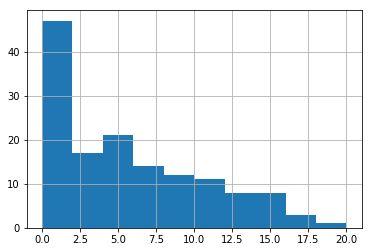

In [85]:
df_p_obese.car_length.hist()

In [86]:
df_p_fit = df_pitchers[df_pitchers['bmi'] <= 30]

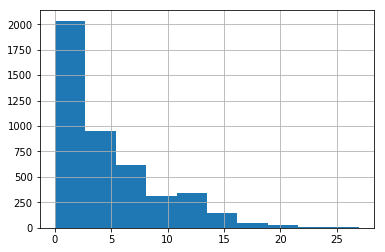

In [87]:
df_p_fit.car_length.hist()

In [88]:
df_p_fit.car_length.mean()

4.525333333333333

In [89]:
df_pitchers.reset_index(drop = True, inplace = True)

In [90]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,76,315,player.php?p=diazju03,Jumbo Diaz,2014,2017,P,3,38.338816
1,72,265,player.php?p=mijarjo01,Jose Mijares,2008,2013,P,5,35.936535
2,75,280,player.php?p=brittch01,Chris Britton,2006,2008,P,2,34.993778
3,76,285,player.php?p=broxtjo01,Jonathan Broxton,2005,2017,P,12,34.687500
4,72,255,player.php?p=machije01,Jean Machi,2012,2017,P,5,34.580440
5,76,280,player.php?p=silvaca01,Carlos Silva,2002,2010,P,8,34.078947
6,72,250,player.php?p=garceri01,Rich Garces,1990,2002,P,12,33.902392
7,75,270,player.php?p=jenksbo01,Bobby Jenks,2005,2011,P,6,33.744000
8,70,235,player.php?p=harrile01,Lenny Harris,1998,2005,P,7,33.715306
9,73,255,player.php?p=queveru01,Ruben Quevedo,2000,2003,P,3,33.639520


In [91]:
stats.ttest_ind(df_p_fit.car_length, df_p_obese.car_length, equal_var = False)

Ttest_indResult(statistic=-1.8736219164562633, pvalue=0.06293652884810132)

In [166]:
f = requests.get('https://www.fangraphs.com/statss.aspx?playerid=375&position=P')

f_soup = BeautifulSoup(f.content, 'html.parser')

trs = f_soup.find_all('tr', {'class':'rgRow'})

df_list = []
for tr in trs: 
    tds = tr.find_all('td')
    for td in tds:
        print(td)
#     if tds[-1] != ' ':
#         print(tds[0].text)
#         print(tds[-1].text)
#         print(tds[1].text)
#     df_list.append(
#     {
#         'year': tds[0].text,
#         'war': tds[-1].text,
#         'team': tds[1].text
#     })

<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=y&amp;type=8&amp;season=1997&amp;month=0&amp;season1=1997&amp;ind=0&amp;team=0&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">1997</a></td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=0&amp;type=8&amp;season=1997&amp;month=0&amp;season1=1997&amp;ind=0&amp;team=5&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">Indians</a></td>
<td align="right" class="grid_line_regular">4</td>
<td align="right" class="grid_line_regular">7</td>
<td align="right" class="grid_line_regular">0</td>
<td align="right" class="grid_line_regular">19</td>
<td align="right" class="grid_line_regular">17</td>
<td align="right" class="grid_line_regular">94.0</td>
<td align="right" class="grid_line_break">6.32</td>
<td align="right" class="grid_line_regular">4.31</td>
<td align="right" class="grid_line_regular">1.15</td>
<td al

<td align="right" class="grid_line_regular">111.1</td>
<td align="right" class="grid_line_regular">466</td>
<td align="right" class="grid_line_regular">120</td>
<td align="right" class="grid_line_regular">62</td>
<td align="right" class="grid_line_regular">60</td>
<td align="right" class="grid_line_regular">22</td>
<td align="right" class="grid_line_regular">18</td>
<td align="right" class="grid_line_regular">1</td>
<td align="right" class="grid_line_regular">2</td>
<td align="right" class="grid_line_regular">1</td>
<td align="right" class="grid_line_regular">0</td>
<td align="right" class="grid_line_regular">64</td>
<td class="grid_line_regular">2018</td>
<td class="grid_line_regular"><a href="projections.aspx?pos=all&amp;stats=pit&amp;type=rzips">ZiPS (R)</a></td>
<td align="right" class="grid_line_regular">2</td>
<td align="right" class="grid_line_regular">5</td>
<td align="right" class="grid_line_regular">5.35</td>
<td align="right" class="grid_line_regular">11</td>
<td align="righ

<td align="right" class="grid_line_regular">.293</td>
<td align="right" class="grid_line_regular">72.9 %</td>
<td align="right" class="grid_line_break"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_break">4.18</td>
<td class="grid_line_regular">2018</td>
<td class="grid_line_regular"><a href="projections.aspx?pos=all&amp;stats=pit&amp;type=rzips">ZiPS (R)</a></td>
<td align="right" class="grid_line_regular">5.56</td>
<td align="right" class="grid_line_regular">1.71</td>
<td align="right" class="grid_line_regular">3.26</td>
<td align="right" class="grid_line_regular">1.70</td>
<td align="right" class="grid_line_break"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_break">.310</td>
<td align="right" class="grid_line_regular">1.46</td>
<td align="right" class="grid_line_regular">.328</td>
<td align="right" class="grid_line_regular">68.0 %</td>
<td

<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=y&amp;type=9&amp;season=2009&amp;month=0&amp;season1=2009&amp;ind=0&amp;team=0&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">2009</a></td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=0&amp;type=9&amp;season=2009&amp;month=0&amp;season1=2009&amp;ind=0&amp;team=4&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">White Sox</a></td>
<td align="right" class="grid_line_regular">54.8 %</td>
<td align="right" class="grid_line_regular">17.0 %</td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td al

<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular">0.16</td>
<td align="right" class="grid_line_regular">-1.65</td>
<td align="right" class="grid_line_regular">1.66</td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"> </td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=y&amp;type=8&amp;season=2013&amp;month=0&amp;season1=2013&amp;ind=0&amp;team=0&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">2013</a></td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=0&amp;type=8&amp;season=2013&amp;month=0&amp;season1=2013&amp;ind=0&amp;team=10&amp;rost=0&amp;age=0&amp;filter=&amp;players=0">Athletics</a></td>
<td align="right" class="grid_line_regular">1.33</td>
<t

<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_break"> </td>
<td align="right" class="grid_line_break"> </td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/minorleaders.aspx?pos=all&amp;stats=bat&amp;lg=2,4&amp;qual=y&amp;type=0&amp;season=2009&amp;team=0&amp;players=0">2009</a></td>
<td class="grid_line_regular"><a href="http://www.fangraphs.com/minorleaders.aspx?pos=all&amp;stats=bat&amp;lg=all&amp;qual=0&amp;type=0&amp;season=2009&amp;team=494&amp;players=0">White Sox (AAA)</a></td>
<td align="right" class="grid_line_regular">P</td>
<td align="right" class="grid_line_regular">2</td>
<td align="right" class="grid_line_regular">2</td>
<td align="right" class="grid_line_regular">12.0</td>
<td align="right" class="grid_line_regular">0</td>
<td align="right" class="grid_line_regular">0</td>
<td align="right" class="grid_line_break">0</td>
<td align="right" class="grid_line_regular"> </td>
<td align="right" class="grid_line_regular"

In [162]:
df_player= pd.DataFrame(df_list)

In [163]:
df_player

,team,war,year
0,Indians,0.7,1997
1,Indians,4.4,1998
2,Indians,,1998
3,Indians,,1999
4,Indians,4.3,2000
5,Indians,3.9,2001
6,Indians,,2001
7,Indians,2.2,2002
8,Expos,2.3,2002
9,Angels,,2004


In [155]:
df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [160]:
df_player.dropna()

,team,war,year
0,Indians,0.7,1997
1,Indians,4.4,1998
4,Indians,4.3,2000
5,Indians,3.9,2001
7,Indians,2.2,2002
8,Expos,2.3,2002
10,Angels,4.1,2005
17,Red Sox,0.5,2008
20,White Sox,0.2,2009
21,Yankees,2.7,2011


In [136]:
f_soup

<!DOCTYPE html>

<html>
<head>
<title>Runtime Error</title>
<meta content="width=device-width" name="viewport"/>
<style>
         body {font-family:"Verdana";font-weight:normal;font-size: .7em;color:black;} 
         p {font-family:"Verdana";font-weight:normal;color:black;margin-top: -5px}
         b {font-family:"Verdana";font-weight:bold;color:black;margin-top: -5px}
         H1 { font-family:"Verdana";font-weight:normal;font-size:18pt;color:red }
         H2 { font-family:"Verdana";font-weight:normal;font-size:14pt;color:maroon }
         pre {font-family:"Consolas","Lucida Console",Monospace;font-size:11pt;margin:0;padding:0.5em;line-height:14pt}
         .marker {font-weight: bold; color: black;text-decoration: none;}
         .version {color: gray;}
         .error {margin-bottom: 10px;}
         .expandable { text-decoration:underline; font-weight:bold; color:navy; cursor:hand; }
         @media screen and (max-width: 639px) {
          pre { width: 440px; overflow: auto; white-